In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [2]:
train = pd.read_csv('C:/Users/Administrator/Downloads/train.csv')
test = pd.read_csv('C:/Users/Administrator/Downloads/test.csv')
sample_submission = pd.read_csv ("C:/Users/Administrator/Downloads/sample_submission.csv")
pd.options.display.max_columns = 999

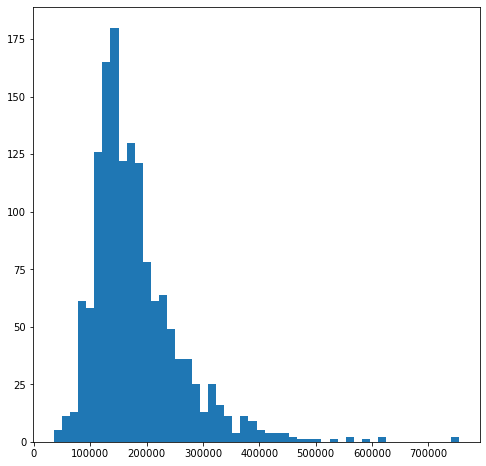

In [3]:
plt.figure(figsize= (8,8))
plt.hist(train['SalePrice'], bins = 50)
plt.show()

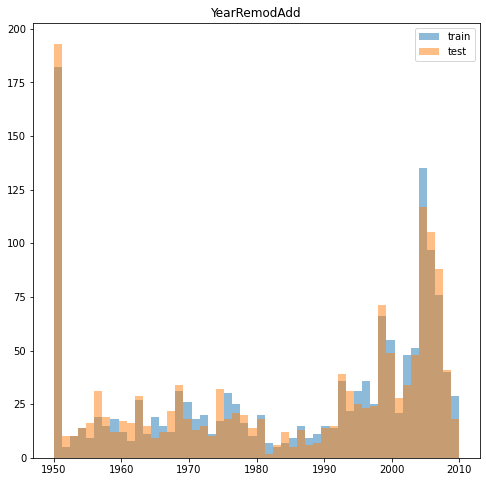

In [4]:
plt.figure(figsize= (8,8))
plt.hist(train['YearRemodAdd'], bins = 50, label = 'train', alpha = 0.5)
plt.hist(test['YearRemodAdd'], bins = 50, label = 'test', alpha = 0.5)
plt.title('YearRemodAdd')
plt.legend(('train', 'test'))
plt.show()

In [5]:
train['SalePriceLog'] =  np.log1p(train['SalePrice'])

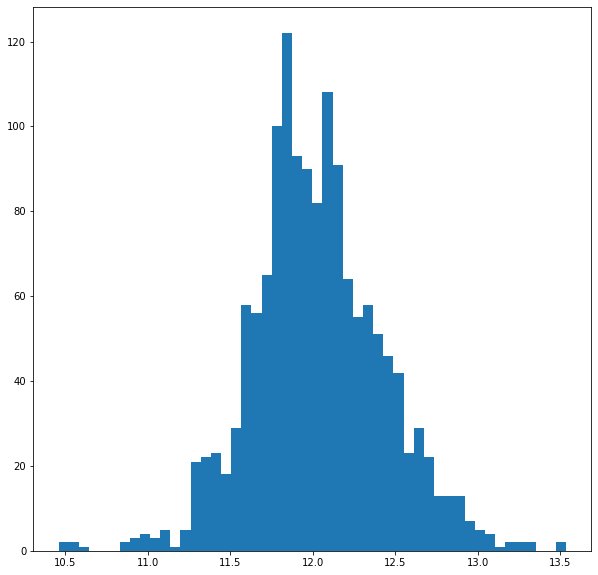

In [6]:
plt.figure(figsize= (10,10))
plt.hist(train['SalePriceLog'], bins = 50)
plt.show()

In [7]:
train['LotAreaLog'] =  np.log1p(train['LotArea'])
test['LotAreaLog'] =  np.log1p(test['LotArea'])

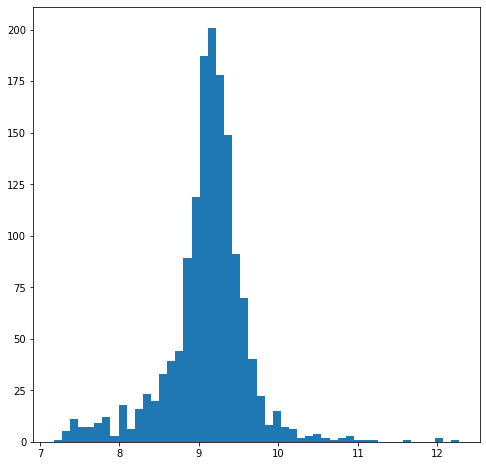

In [8]:
plt.figure(figsize= (8,8))
plt.hist(train['LotAreaLog'], bins = 50)
plt.show()

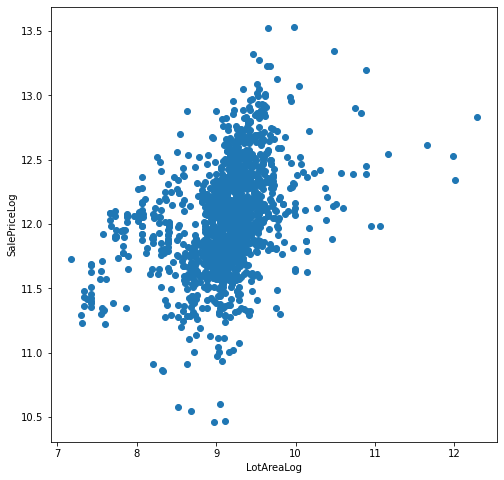

In [9]:
plt.figure(figsize= (8,8))
plt.scatter( train['LotAreaLog'], train['SalePriceLog'])
plt.xlabel('LotAreaLog')
plt.ylabel('SalePriceLog')
plt.show()

In [10]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [11]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog']], train.loc[test_index, ['LotAreaLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
0 0.537608218259985
1 0.643044622251592
2 0.5812975171748722
3 0.5897976205147342
4 0.5807268044255562
Mean rmse for 5-fold: 0.586494956525348
std rmse for 5-fold: 0.033642147422098485


In [12]:
_max = max(max(train['YearRemodAdd']), max(test['YearRemodAdd']))
_min = min(min(train['YearRemodAdd']), min(test['YearRemodAdd']))
print(_min , _max)

1950 2010


In [13]:
train['YearRemodAdd'] = (train['YearRemodAdd'] - _min)/(_max - _min)
test['YearRemodAdd'] = (test['YearRemodAdd'] - _min)/(_max - _min)

In [14]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'YearRemodAdd']], train.loc[test_index, ['LotAreaLog', 'YearRemodAdd']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [1.14501743 0.73793178]
0 0.5217467607097626
model.coef_:  [1.15747262 0.70266621]
1 0.5826906718330447
model.coef_:  [1.10616868 0.71110441]
2 0.49041011177888205
model.coef_:  [1.1838724  0.70362683]
3 0.5545348339005601
model.coef_:  [1.15060648 0.74326119]
4 0.5431346971261286
Mean rmse for 5-fold: 0.5385034150696756
std rmse for 5-fold: 0.03106354812395846


In [15]:
train['YearRemodAdd'] = pre.scale(train['YearRemodAdd'])
test['YearRemodAdd'] = pre.scale(test['YearRemodAdd'])

In [16]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'YearRemodAdd']], train.loc[test_index, ['LotAreaLog', 'YearRemodAdd']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [1.20079301 0.21577429]
0 0.5159509004178716
model.coef_:  [1.17576301 0.20141813]
1 0.5870182199055543
model.coef_:  [1.21197257 0.20578703]
2 0.5523526522273158
model.coef_:  [1.20040258 0.20355071]
3 0.5520681004875464
model.coef_:  [1.23818844 0.21266403]
4 0.5715487946590379
Mean rmse for 5-fold: 0.5557877335394652
std rmse for 5-fold: 0.023817485396645376


In [17]:
model = SGDRegressor()
model.fit(train[['LotAreaLog', 'YearRemodAdd']], train['SalePriceLog'])
model.coef_

array([1.16229381, 0.21329396])

In [18]:
model.intercept_

array([1.44576384])

In [19]:
prediction = model.predict(test[['LotAreaLog', 'YearRemodAdd']])

In [20]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [21]:
sample_submission['SalePrice']=  np.expm1(prediction)

In [22]:
sample_submission.head()

,Id,SalePrice
0,1461,179306.154025
1,1462,220767.907873
2,1463,318895.114608
3,1464,218209.092879
4,1465,92116.904300


In [23]:
sample_submission.to_csv('submission.csv', index = None)

In [24]:
0.54662

0.54662